In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# 1-2

You have an unfair coin with p(H) = p. You toss the coin n times and note the number of heads obtained. What is the probability that the number of heads would be an even number? Can you code the above problem using dynamic programming?

In [35]:
def prob_even_heads(n, p):
    even_ks = np.arange(0, n+1, 2)
    p = ss.binom.pmf(k = even_ks, n = n, p = p).sum() # probability that number of heads is even
    return p

In [45]:
n = 100
p = 0.8
p_even = prob_even_heads(n = n, p = p)

print(f"Prob(Number of heads in {n} tosses with loaded probability {p} = {p_even:.4f}.")

Prob(Number of heads in 100 tosses with loaded probability 0.8 = 0.5000.


# 3

A game of dice is begun by rolling an ordinary pair of dice. If the sum of the dice is 2, 3, or 12, the player loses. If it is 7 or 11, the player wins. If it is any other number i, the player continues to roll the dice until the sum is either 7 or i. If it is 7, the player loses; if it is i, the player wins. Let R denote the number of rolls of the dice in a game of craps. 

Find:

E[R]

E[R|player wins]

E[R|player loses]

In [110]:
# Perform one die roll
def roll():  
    return np.random.randint(1, 7)

# Game
def game():

    rolls = 1

    roll_sum = roll() + roll()

    first_roll_sum = roll_sum

    if roll_sum in [2, 3, 12]:
        return rolls, 'lose'
    elif roll_sum in [7, 11]:
        return rolls, 'win'

    while True:        
        rolls += 1

        roll_sum = roll() + roll()

        if roll_sum == 7:
            return roll_sum, 'lose'
        elif roll_sum == first_roll_sum:
            return rolls, 'win'

# Play the game many times
def play(num_games = 1000):
    total_rolls = 0
    win_rolls = 0
    lose_rolls = 0
    wins = 0
    losses = 0

    expected_rolls = []
    expected_rolls_win = []
    expected_rolls_lose = []
    for _ in range(num_games):
        rolls, outcome = game()
        
        total_rolls += rolls
        
        if outcome == 'win':
            wins += 1
            win_rolls += rolls
        else:
            losses += 1
            lose_rolls += rolls

        expected_rolls.append((total_rolls / (_ + 1)))
        expected_rolls_win.append(win_rolls / wins if wins > 0 else 0)
        expected_rolls_lose.append(lose_rolls / losses if losses > 0 else 0)    

    expected_rolls = np.stack(expected_rolls)
    expected_rolls_win = np.stack(expected_rolls_win)
    expected_rolls_lose = np.stack(expected_rolls_lose)

    # expected_rolls = total_rolls / num_games
    # expected_rolls_win = win_rolls / wins if wins > 0 else 0
    # expected_rolls_lose = lose_rolls / losses if losses > 0 else 0

    return expected_rolls, expected_rolls_win, expected_rolls_lose



In [112]:
# Play the game and collect the expectred rolls, rolls given a wine, rolls given a loss
expected_rolls, expected_rolls_win, expected_rolls_lose = play(10000)

E[R] = 4
E[R|win] = 3
E[R|lose] = 6


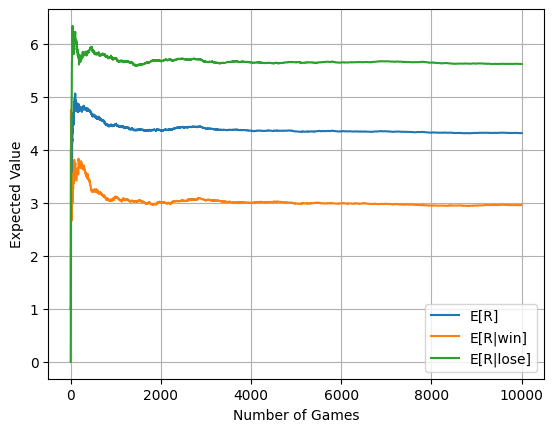

In [121]:
plt.plot(expected_rolls, label = 'E[R]')
plt.plot(expected_rolls_win, label = 'E[R|win]')
plt.plot(expected_rolls_lose, label = 'E[R|lose]')
plt.xlabel('Number of Games')
plt.ylabel('Expected Value')
plt.grid()
plt.legend() ; 

print(f"E[R] = {expected_rolls[-1]:.0f}")
print(f"E[R|win] = {expected_rolls_win[-1]:.0f}")
print(f"E[R|lose] = {expected_rolls_lose[-1]:.0f}")


# 4

Generate 2 normal random variables, X~N(1,9) & Y~N(9,16) in Python. Then add X and Y to get Z. What is the distribution of Z? What does Z look like after plotting? Does the plot support theory?

In [122]:
N = 1000
X_mean, X_sdev = 1, 9
Y_mean, Y_sdev = 9, 16

X = ss.norm.rvs(loc = X_mean, scale = X_sdev, size = (N,))
Y = ss.norm.rvs(loc = Y_mean, scale = Y_sdev, size = (N,))
Z = X + Y

print(f"Theoretical mean of Z = X_mean + Y_mean = {X_mean + Y_mean}.")
print(f"Theoretical sdev of Z = sqrt(X_sdev^2 + Y_sdev^2) = {np.sqrt(X_sdev**2 + Y_sdev**2):.2f}.")

print(f"Emperical mean of Z = X_mean + Y_mean = {Z.mean():.2f}.")
print(f"Emperical sdev of Z = sqrt(X_sdev^2 + Y_sdev^2) = {Z.std():.2f}.")


Theoretical mean of Z = X_mean + Y_mean = 10.
Theoretical sdev of Z = sqrt(X_sdev^2 + Y_sdev^2) = 18.36.
Emperical mean of Z = X_mean + Y_mean = 9.89.
Emperical sdev of Z = sqrt(X_sdev^2 + Y_sdev^2) = 18.73.


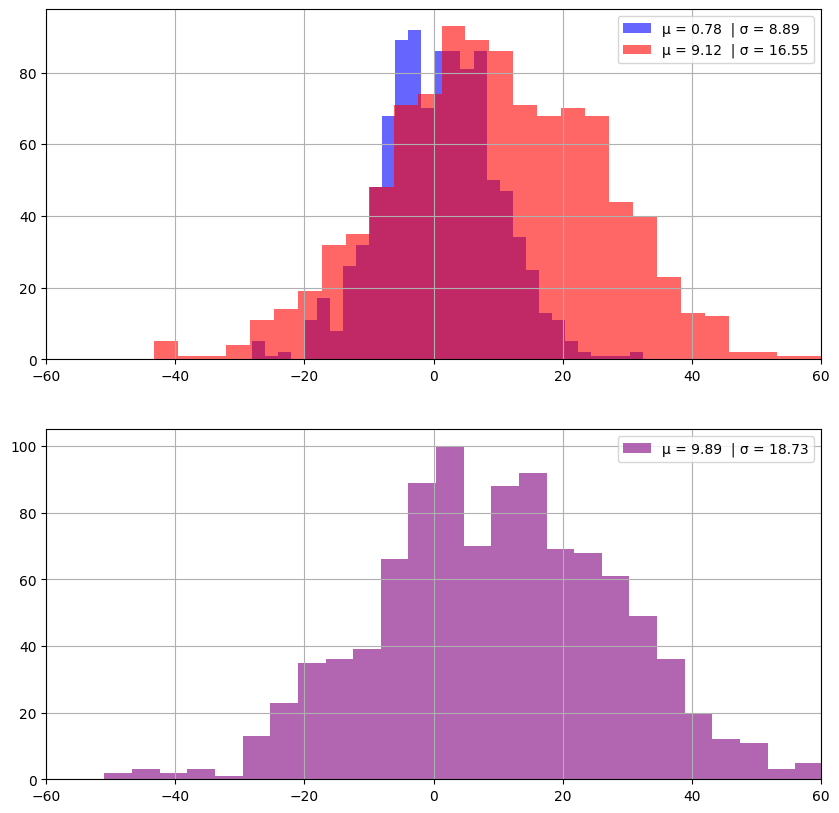

In [123]:
fig, ax = plt.subplots(2, 1, figsize = (10, 10))

ax[0].hist(X, color = 'blue', alpha = 0.6, bins = 30,
           label = f"μ = {X.mean():.2f}  | σ = {X.std():.2f}")
ax[0].hist(Y, color = 'red', alpha = 0.6, bins = 30,
           label = f"μ = {Y.mean():.2f}  | σ = {Y.std():.2f}")
ax[0].set_xlim([-60, 60])           
ax[0].grid()           
ax[0].legend()

ax[1].hist(Z, color = 'purple', alpha = 0.6, bins = 30,
           label = f"μ = {Z.mean():.2f}  | σ = {Z.std():.2f}") ;
ax[1].set_xlim([-60, 60])                      
ax[1].grid()
ax[1].legend() ;

The results are consistent with the theoretical values.

# 5

Mark was first to arrive at a 100 seat theater. He forgot his seat number and picked a random seat for himself. After this, every single person who gets to the theater sits on his/her seat if it is available, and chooses any available seat at random. John was last to enter the theater and 99 seats were occupied. What's the probability that John gets to sit in his own seat? Can we write a simulation to verify the result?

If Mark choses his assigned seat (E1), then everyone, including John, will sit in their assigned seat. If Mark does not chose his seat, then all but one will seat in their assigned seat, where the second-to-last person will have to randomly chose one of the two remaining seats before John enters. Then John will sit in the remaining seat. If Mark happens to sit in John's seat (E2), then even when everyone sits down before John enters, John will not be able to sit in his seat. If Mark does not chose John's seat, then when everyone sits down before John enters, 

E1: Mark sits in his assigned seat
<!-- E2: Mark sits in John's seat -->
E3: John sits in his assigned seat

By the Law of Total Probability,

P(E3) = P(E3|E1)*P(E1) + P(E3|~E1)*P(~E1)

P(E3|E1) = 1
P(E1) = 1/100
P(~E1) = 99/100
P(E3|~E1) = 1/2

In [124]:
p_E3gE1 = 1
P_E1 = 1/100
p_E3gnE1 = 1/2
P_nE1 = 99/100

p_E3 = p_E3gE1*P_E1 + p_E3gnE1*P_nE1

print(f"P(John sits in his own seat = {p_E3:.4f})")

P(John sits in his own seat = 0.5050)
